In [1]:
NUMERICAL_DATA = ['VehOdo','VehicleAge', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
                  'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
                  'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
                  'VehBCost', 'WarrantyCost']

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", context="talk")
PATH = '../data/'

# Training data
data_TR = pd.read_csv(PATH + 'training.csv')
# Test data
data_TS = pd.read_csv(PATH + 'test.csv')
data_TOT = pd.concat([data_TS, data_TR])

data_TOT.shape

(72983, 34)

**Numero totale di righe aventi almeno un Nan: Sono TANTISSIMI, POTA**

In [9]:
data_TOT.isna().any(axis=1).sum()

69707

**Conto i price data che sono negativi o Nan per colonna**

In [10]:
prd = data_TOT.loc[:, data_TOT.columns.isin(NUMERICAL_DATA) & ~data_TOT.columns.isin(['VehOdo','VehicleAge'])]

prd.apply(lambda s : s.apply(lambda x : (x <= 0 or np.isnan(x)))).sum()

MMRAcquisitionAuctionAveragePrice    846
MMRAcquisitionAuctionCleanPrice      715
MMRAcquisitionRetailAveragePrice     846
MMRAcquisitonRetailCleanPrice        846
MMRCurrentAuctionAveragePrice        819
MMRCurrentAuctionCleanPrice          693
MMRCurrentRetailAveragePrice         819
MMRCurrentRetailCleanPrice           819
VehBCost                               0
WarrantyCost                           0
dtype: int64

**Conto i categorical data che sono Nan per colonna**

In [11]:
cd = data_TOT.loc[:, ~data_TOT.columns.isin(prd.columns)]

cd.isna().sum()

RefId                       0
IsBadBuy                    0
PurchDate                   0
Auction                     0
VehYear                     0
VehicleAge                  0
Make                        0
Model                       0
Trim                     2360
SubModel                    8
Color                       8
Transmission                9
WheelTypeID              3169
WheelType                3174
VehOdo                      0
Nationality                 5
Size                        5
TopThreeAmericanName        5
PRIMEUNIT               69564
AUCGUART                69564
BYRNO                       0
VNZIP1                      0
VNST                        0
IsOnlineSale                0
dtype: int64

**----------------------- INIZIO PULIZIA DATI ---------------------------**

In [12]:
df = data_TOT.copy()

** Proviamo a cavare tutte le righe corrispondenti che hanno un Nan in corrispondenza di una colonna che ha pochi Nan in totale (ad esempio le righe aventi prezzi privi di significato)**

In [13]:
prd_dps = prd.apply(lambda s : s.apply(lambda x : (x <= 0 or np.isnan(x)))).any(axis=1)

In [14]:
cd_dps = cd.loc[: ,['SubModel', 'Color', 'Transmission', 'Nationality', 'Size',  'TopThreeAmericanName']]
cd_dps = cd_dps.isna().any(axis=1)

In [15]:
to_keep = ~(cd_dps | prd_dps)

In [16]:
df = df[to_keep]

**Proviamo a cavare le due colonne malvagie**

In [17]:
df = df.drop(columns=['PRIMEUNIT', 'AUCGUART'])

**Risultato Finale**

In [18]:
df.apply(lambda s : s.apply(lambda x : (isinstance(x, float) and (x <= 0 or np.isnan(x))))).sum()

RefId                                   0
IsBadBuy                                0
PurchDate                               0
Auction                                 0
VehYear                                 0
VehicleAge                              0
Make                                    0
Model                                   0
Trim                                 2335
SubModel                                0
Color                                   0
Transmission                            0
WheelTypeID                          3130
WheelType                            3130
VehOdo                                  0
Nationality                             0
Size                                    0
TopThreeAmericanName                    0
MMRAcquisitionAuctionAveragePrice       0
MMRAcquisitionAuctionCleanPrice         0
MMRAcquisitionRetailAveragePrice        0
MMRAcquisitonRetailCleanPrice           0
MMRCurrentAuctionAveragePrice           0
MMRCurrentAuctionCleanPrice       

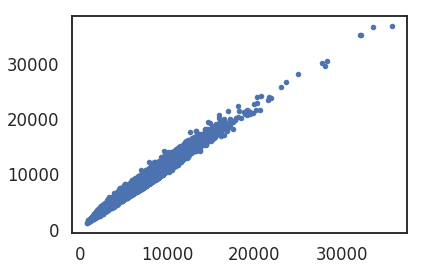

In [22]:
plt.plot(df.MMRAcquisitionAuctionAveragePrice, df.MMRAcquisitionAuctionCleanPrice, '.')

plt.show()